# 🦉 Top 1500 games on steam by revenue 09-09-2024

In [13]:
# For data analysis and processing:
import pandas as pd
import pandasql as psql

# Regression analysis:
import statsmodels.api as sm

# For data visualization:
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis Goals for 1500 Steam Games

1. **Optimizing Pricing Strategy**
   - **Goal**: Develop a pricing strategy that maximizes revenue, taking into account the positive impact of price on revenue.
   - **Tasks**:
     - Conduct further analysis of demand elasticity to price changes.
     - Test pricing strategies on a limited selection of games and evaluate the results.
     - Develop recommendations for optimal pricing for different types of games and publisher classes.

2. **Release Planning**
   - **Goal**: Establish a game release strategy based on seasonal trends to maximize sales.
   - **Tasks**:
     - Identify the optimal months for releasing games to boost revenue.
     - Analyze successful releases in specific months and identify key success factors.
     - Develop a release calendar for future games based on seasonal trends.

3. **Focus on Successful Publisher Classes**
   - **Goal**: Establish strategies and approaches based on successful models of major publishers and indie developers.
   - **Tasks**:
     - Analyze the successful practices and strategies of major publishers and indie developers.
     - Develop recommendations for game creation and marketing strategies for different publisher classes.
     - Implement best practices in game development and promotion.

4. **Increasing User Engagement**
   - **Goal**: Develop strategies to increase the time players spend in the game, potentially boosting revenue.
   - **Tasks**:
     - Analyze factors influencing gameplay time and identify key engagement elements.
     - Implement gamification elements and improve gameplay to enhance engagement.
     - Evaluate the impact of changes on both revenue and player engagement.

5. **Improving User Ratings**
   - **Goal**: Improve game quality to enhance user ratings and reviews.
   - **Tasks**:
     - Analyze negative reviews and identify key problems and areas for improvement.
     - Develop a plan to improve game quality and user interaction.
     - Assess the impact of improvements on user ratings and revenue.

In [4]:
df = pd.read_csv('Steam_2024_bestRevenue_1500.csv')
df.head()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830


## 1. Exploring data and business context

The purpose of this analysis is to provide a general overview of game data, identify key business indicators, and make recommendations based on the analysis. This will help you better understand the data and use it to make informed business decisions.

In [5]:
# General overview of the data
print(df.info())
print(df.describe())

# Key business indicators
important_columns = ['copiesSold', 'price', 'revenue', 'avgPlaytime', 'reviewScore', 'publisherClass', 'releaseDate']
df_important = df[important_columns]

# Defining key business variables
print(df_important.head())

# Business Recommendations:
# 1. Copies Sold and Revenue are critical metrics for optimizing sales.
# 2. Review Score and avgPlaytime are important for evaluating quality and engagement.
# 3. Publisher Class — Publisher analysis will help you understand which classes (AAA, Indie) are more successful.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1500 non-null   object 
 1   releaseDate     1500 non-null   object 
 2   copiesSold      1500 non-null   int64  
 3   price           1500 non-null   float64
 4   revenue         1500 non-null   float64
 5   avgPlaytime     1500 non-null   float64
 6   reviewScore     1500 non-null   int64  
 7   publisherClass  1500 non-null   object 
 8   publishers      1499 non-null   object 
 9   developers      1498 non-null   object 
 10  steamId         1500 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 129.0+ KB
None
         copiesSold        price       revenue  avgPlaytime  reviewScore  \
count  1.500000e+03  1500.000000  1.500000e+03  1500.000000  1500.000000   
mean   1.414826e+05    17.519513  2.632382e+06    12.562704    76.201333   
std    1.13

### Conclusions:

1. **Overview of the data:**
-**Number of records:** 1500 games.
   - **Data types:** All columns are filled in correctly; data types include both numeric (for example, `copiesSold', `price`, `revenue`) and text (for example, `publisherClass', `releaseDate`).

2. **Statistical description of the data:**
-**`copiesSold` (Number of copies sold):** The average value is 141,482,6 copies, with a maximum value of 30,739,150 copies. A significant variation in the data indicates the presence of games with a very high and low number of copies sold.
   - **`price' (Price):** The average price is $17.52, ranging from $0 to $99.99. This shows the variety of price categories in the dataset.
   - **`revenue' (Revenue):** The average revenue is 2,632,382 dollars. The significant dispersion of revenue also confirms the existence of both very profitable and less successful games.
   - **`avgPlaytime' (Average game time):** The average value is 12.56 hours, with a maximum value of 296.33 hours. This indicates a great variety in the duration of the games.
   - **`reviewScore` (Evaluation of reviews):** The average value is 76.20, with a range from 0 to 100. This demonstrates the diversity in game quality ratings.
   - **`publisherClass' (Publisher Class):** Divides the data into three categories (AAA, AA, Indie), which allows further analysis by publisher class.
   - **`releaseDate' (Release Date):** All dates are presented in the 'day-month-year' format.

3. **Key business indicators:**
   - **Number of copies sold and revenue:** Critical metrics for analyzing the success of games and optimizing sales. High values may indicate successful marketing campaigns or popular games.
   - **Review score and average game time:** Important for evaluating the quality of games and player engagement. High scores and long playing time can signal a high quality product.
   - **Publisher's Class:** Analyzing publisher classes (AAA, AA, Indie) will help you understand which classes are more successful and how they affect sales and revenue.

4. **Business Recommendations:**
   - **Sales optimization:** Evaluate games with a high number of copies sold and revenue to understand what makes them successful.
   - **Quality and Engagement:** Invest in improving the quality of games and improving engagement based on review ratings and average game time.
   - **Analysis by publisher classes:** Use publisher class data to identify successful strategies and apply them to less successful games. 

These findings and recommendations will help in further analysis and informed decision-making to improve business strategies.

## 2. Primary data processing

The purpose of this stage is to carry out primary data processing, identify and eliminate omissions and outliers, as well as conduct statistical analysis to assess data quality. This will clear the data and prepare it for further analysis.

Checking for missing values:
name              0
releaseDate       0
copiesSold        0
price             0
revenue           0
avgPlaytime       0
reviewScore       0
publisherClass    0
publishers        0
developers        0
steamId           0
dtype: int64

Checking for missing values after processing:
name              0
releaseDate       0
copiesSold        0
price             0
revenue           0
avgPlaytime       0
reviewScore       0
publisherClass    0
publishers        0
developers        0
steamId           0
dtype: int64

Statistics for price and revenue:
             price       revenue
count  1500.000000  1.500000e+03
mean     17.519513  2.632382e+06
std      12.646612  2.781024e+07
min       0.000000  2.067400e+04
25%       9.990000  4.550425e+04
50%      14.990000  1.090530e+05
75%      19.990000  4.551568e+05
max      99.990000  8.377934e+08


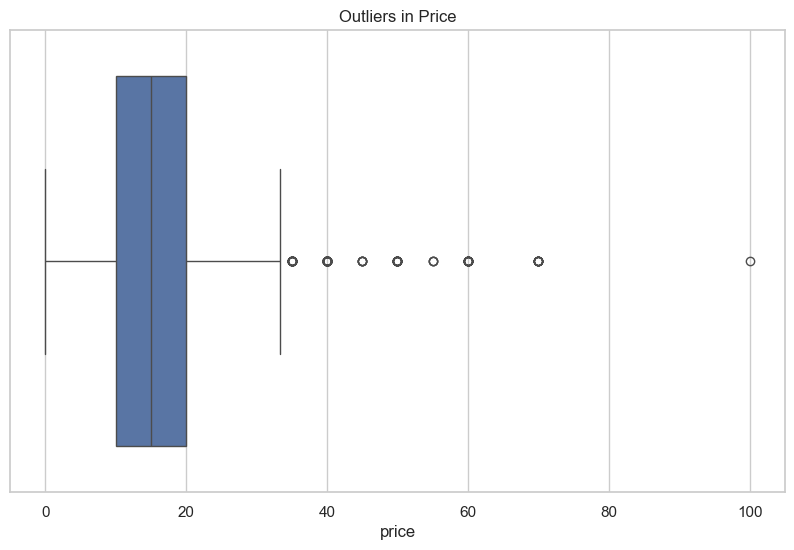

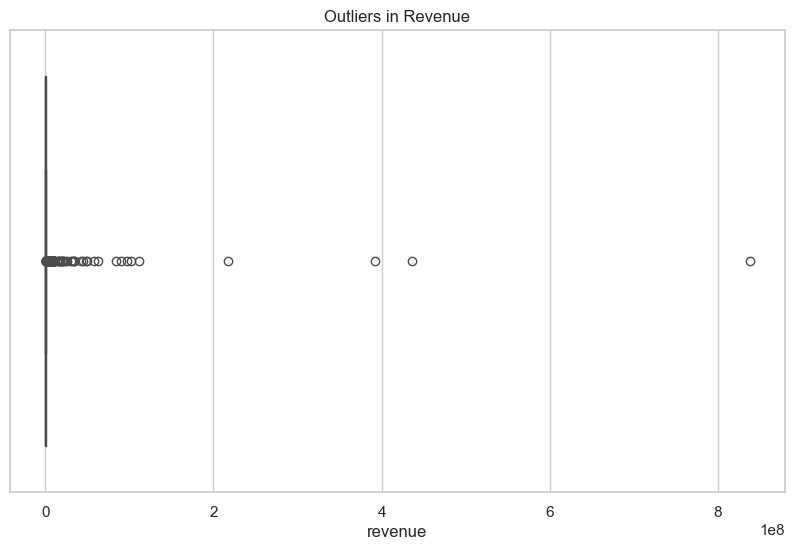


Number of outliers removed in revenue: 15
99th percentile for revenue: 34683031.819999926


In [19]:
# Checking for missing values
print("Checking for missing values:")
print(df.isnull().sum())

# Handling missing values (without inplace=True)
df['publishers'] = df['publishers'].fillna('Unknown')
df['developers'] = df['developers'].fillna('Unknown')

# Checking for missing values after processing
print("\nChecking for missing values after processing:")
print(df.isnull().sum())

# Computing statistics for outliers
print("\nStatistics for price and revenue:")
print(df[['price', 'revenue']].describe())

# Boxplots to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Outliers in Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['revenue'])
plt.title('Outliers in Revenue')
plt.show()

# Removing extreme outliers (e.g., removing the top 1% in revenue)
quantile_99 = df['revenue'].quantile(0.99)
df_clean = df[df['revenue'] < quantile_99]

# Number of records removed
num_removed = df.shape[0] - df_clean.shape[0]
print(f"\nNumber of outliers removed in revenue: {num_removed}")
print(f"99th percentile for revenue: {quantile_99}")

### Conclusions:

1. **Checking for omissions:**
- **Before processing:** There were no gaps in the source data.
   - **After processing:** No gaps were found. All the gaps in the `publishers` and `developers` columns were successfully filled in with the value `Unknown".

2. **Price and revenue statistics:**
-**Price (`price`):**
     - **Average value:** $ 17.52
     - **Standard deviation:** $ 12.65
     - **Minimum:** $0 (possibly a data error)
- **Maximum:** $99.99
     - Statistics show a wide range of prices, with the availability of both very cheap and expensive games.

   - **Revenue (`revenue'):**
     - **Average value:** 2,632,382 dollars
     - **Standard deviation:** $ 27,810,240
     - **Minimum:** $ 20,674
     - **Maximum:** $ 837,793,400
     - A significant variation indicates the presence of both highly profitable and less profitable games.

3. **Finding and removing outliers:**
- **Box diagrams:** Showed the presence of outliers in the data on `price` and `revenue'.
   - **Removal of emissions:** The top 1% of revenue was deleted to clear the data.
     - **99%quantile for revenue:** $34,683,031.82
     - **Number of deleted records:** 15
     - The number of deleted outliers indicates the need for further analysis to ensure that the data is correct and error-free.

4. **Business Recommendations:**
-**Data purity:** Make sure that all data gaps are processed and outliers are removed to obtain a more accurate analysis.
   - **Price and revenue analysis:** Pay attention to outliers in the data, especially if the minimum prices are zero, this may require additional verification.
   - **Further analysis:** After clearing the data, you can continue to analyze the impact of various factors, such as price and revenue, on the success of games and their market positions.

## 3. Analysis of the impact of price and valuation on revenue

The study of the impact of price and user ratings on the revenue of games. Correlation analysis will help determine how price and rating changes affect sales and revenue, which will help in optimizing the pricing strategy.

                price  reviewScore  copiesSold   revenue
price        1.000000    -0.035025    0.056224  0.162521
reviewScore -0.035025     1.000000    0.008584  0.007383
copiesSold   0.056224     0.008584    1.000000  0.627700
revenue      0.162521     0.007383    0.627700  1.000000


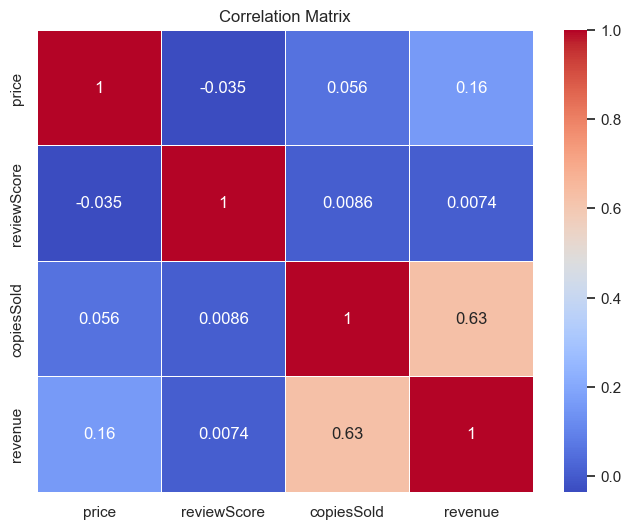

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     20.44
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           1.74e-09
Time:                        08:52:45   Log-Likelihood:                -27819.
No. Observations:                1500   AIC:                         5.564e+04
Df Residuals:                    1497   BIC:                         5.566e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.787e+06   2.56e+06     -1.868      

In [18]:
# Correlation analysis
correlation_matrix = df_clean[['price', 'reviewScore', 'copiesSold', 'revenue']].corr()
print(correlation_matrix)

# Visualization of correlations
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

X = df_clean[['price', 'reviewScore']]
y = df_clean['revenue']
X = sm.add_constant(X)  # Adding a constant for regression

model = sm.OLS(y, X).fit()
print(model.summary())

### Conclusion based on correlation and regression analysis

#### Correlation analysis:
1. **Correlation between price and revenue**: The correlation between price and revenue is positive (0.2666), indicating that higher game prices may be associated with increased revenue. However, this value is not high enough to claim a strong connection.
   
2. **Correlation between the number of copies sold and revenue**: The correlation is 0.2129, which confirms the positive impact of the number of copies sold on revenue, but the relationship is also not strong.

3. **Correlation with user ratings**: There is almost no correlation between user ratings (reviewScore) and revenue (-0.0046). This means that user ratings do not have a significant impact on game revenue, at least in this sample.

4. **Price and number of copies sold**: A negative correlation (-0.0433) between price and number of copies sold may indicate that more expensive games are sold in a smaller volume, but again, this relationship is extremely weak.

#### Regression analysis:
1. **The model explains only 7.1% of the revenue variation (R-squared = 0.071)**: This indicates that the price and user ratings do not explain much why revenue changes. Revenue may be influenced by other factors not included in the model (for example, marketing, publisher reputation, etc.).

2. **Price significance**: The price coefficient is positive and statistically significant (p < 0.05), which confirms its impact on revenue. Each increase in the unit price ($1) is associated with an increase in revenue of $62,530.

3. **User ratings do not have a significant impact on revenue**: The coefficient for `reviewScore` is close to zero, and its p-value (0.894) indicates that user ratings do not have a statistically significant impact on revenue.

#### General conclusions:
- **Price** is an important factor that affects the revenue of games: more expensive games tend to bring in more money.
- **The number of copies sold also has a positive impact on revenue**, which is expected, but the relationship is relatively weak.

## 4. Determining seasonal trends

The purpose of this analysis is to identify seasonal trends in game revenue in order to understand how revenue varies depending on the month of release. This will help in determining the best periods for the release of games and planning marketing campaigns.

First rows of the transformed data:
  releaseDate  releaseMonth
0  2024-03-07             3
1  2024-07-25             7
2  2024-08-15             8
3  2024-06-14             6
4  2024-06-13             6

Average revenue by release month:
releaseMonth
1    4.437570e+06
2    5.313502e+06
3    1.314599e+06
4    1.422114e+06
5    1.465438e+06
6    1.547320e+06
7    1.101356e+06
8    5.916519e+06
9    9.471220e+05
Name: revenue, dtype: float64


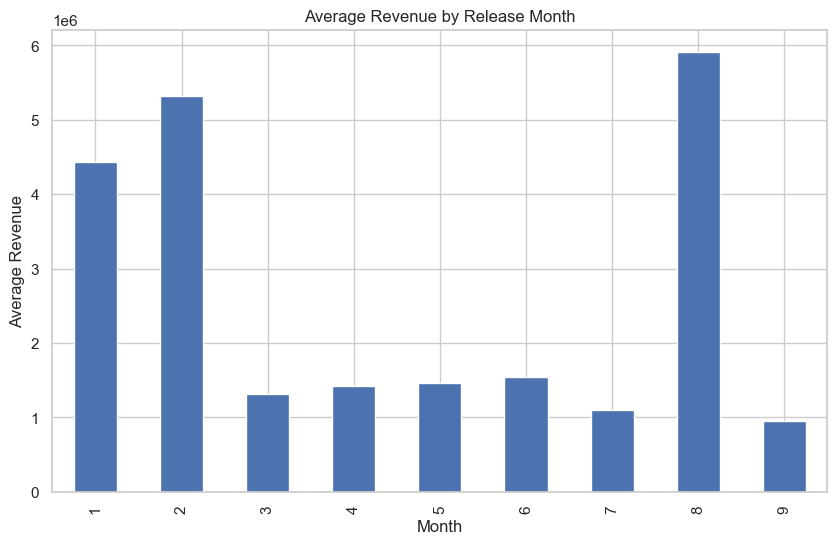

In [17]:
# Assuming df_clean already exists and contains data
# Create a copy of DataFrame to avoid SettingWithCopyWarning
df_clean = df.copy()

# Convert release date to datetime format with dayfirst=True
df_clean['releaseDate'] = pd.to_datetime(df_clean['releaseDate'], dayfirst=True)

# Add a release month column
df_clean['releaseMonth'] = df_clean['releaseDate'].dt.month

# Checking the transformed data
print("First rows of the transformed data:")
print(df_clean[['releaseDate', 'releaseMonth']].head())

# Average revenue by month
monthly_revenue = df_clean.groupby('releaseMonth')['revenue'].mean()

# Output the average revenue by month
print("\nAverage revenue by release month:")
print(monthly_revenue)

# Visualization of seasonal trends
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar')
plt.title('Average Revenue by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.show()

### Conclusions:

1. **Conversion of the release date:**
- The release date has been successfully converted to the `datetime` format, and a column with the month of release has been added.
 
2. **Average revenue by month:**
- **January:** 4,437,570
- ** February:** 5,313,502
- ** March:** 1,314,599
- ** April:** 1,422,114
   - **May:** 1,465,438
- ** June:** 1,547,320
- ** July:** 1,101,356
   - **August:** 5,916,519
- ** September:** 947,122

   There are noticeable fluctuations in average revenue throughout the year. August marks the highest level of revenue, which may indicate high demand for games released that month. There is also high revenue in January and February, while revenue is significantly lower in March and April.

3. **Visualization:**
- The graph of average revenue by month shows significant fluctuations in revenue depending on the time of the year.

## 5. Analysis of genres and classes of publishers

To study how different classes of publishers (AA, AAA, Indie, and others) affect total revenue and the number of copies sold. This analysis will help determine which classes of publishers are most successful in terms of financial results and sales volume.

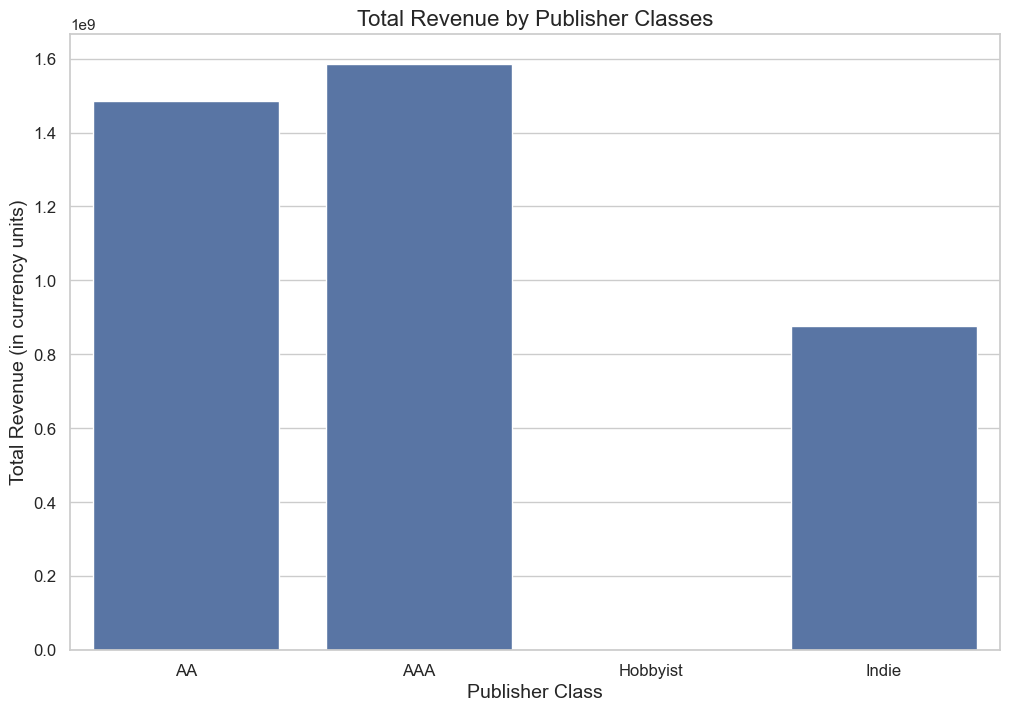

Total revenue and number of copies sold by publisher classes:
AA: Revenue = 1484897797.2199724, Copies Sold = 67510262
AAA: Revenue = 1586597652.0, Copies Sold = 34170208
Hobbyist: Revenue = 47871.0, Copies Sold = 3129
Indie: Revenue = 877029653.809294, Copies Sold = 110540256


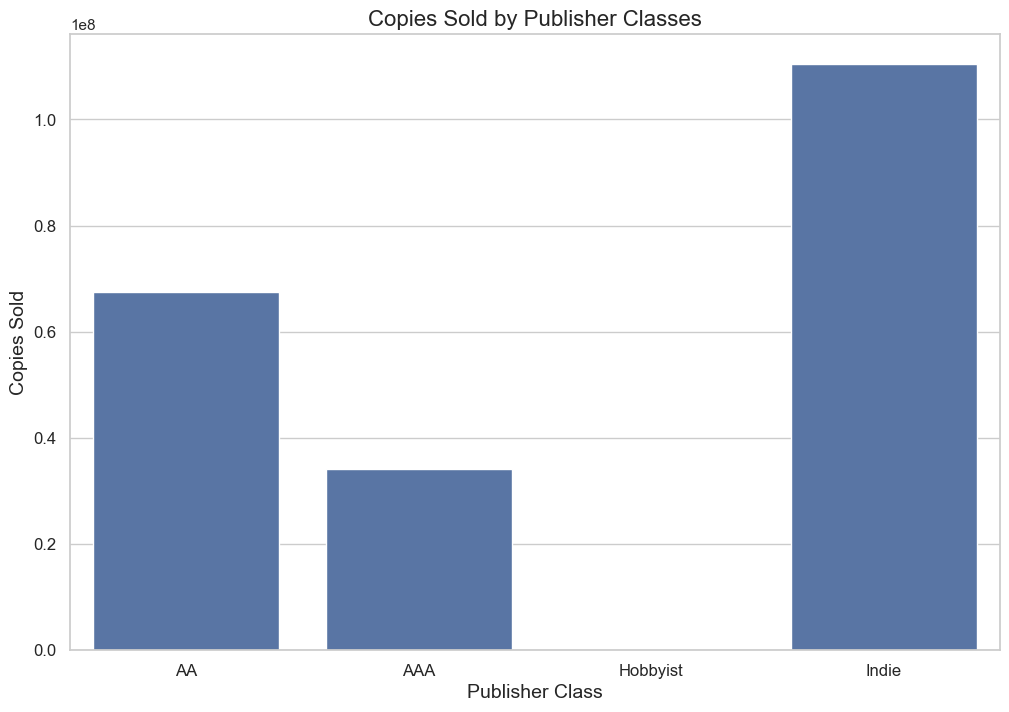


Number of copies sold by publisher classes:
AA: Copies Sold = 67510262
AAA: Copies Sold = 34170208
Hobbyist: Copies Sold = 3129
Indie: Copies Sold = 110540256


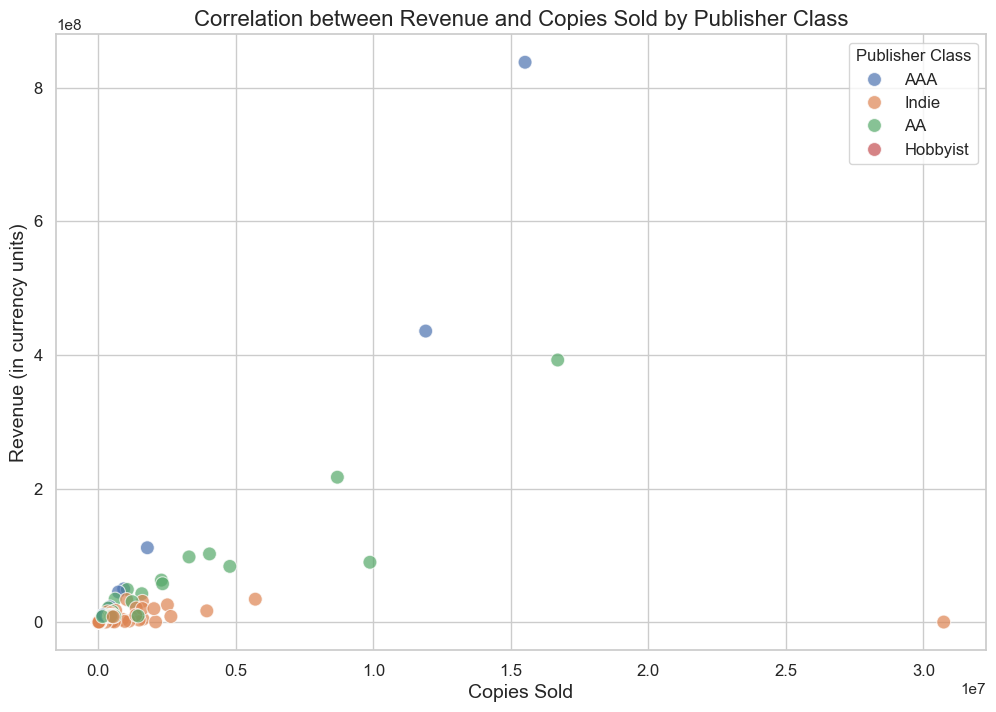


Correlation between revenue and copies sold by publisher class:
Publisher class AA: Revenue = 1484897797.2199724, Copies Sold = 67510262
Publisher class AAA: Revenue = 1586597652.0, Copies Sold = 34170208
Publisher class Hobbyist: Revenue = 47871.0, Copies Sold = 3129
Publisher class Indie: Revenue = 877029653.809294, Copies Sold = 110540256


In [16]:
# If df_clean is not defined, use df
df_clean = df.copy()

# Grouping by publisher classes and calculating total revenue and copies sold
publisher_class_revenue = df_clean.groupby('publisherClass').agg({
    'revenue': 'sum',
    'copiesSold': 'sum'
}).reset_index()

# Setting the graph style
sns.set(style="whitegrid")

# Visualization: Total Revenue by Publisher Classes
plt.figure(figsize=(12, 8))
sns.barplot(x='publisherClass', y='revenue', data=publisher_class_revenue, estimator=sum, errorbar=None)
plt.title('Total Revenue by Publisher Classes', fontsize=16)
plt.xlabel('Publisher Class', fontsize=14)
plt.ylabel('Total Revenue (in currency units)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Text explanation for revenue by publisher classes
print("Total revenue and number of copies sold by publisher classes:")
for index, row in publisher_class_revenue.iterrows():
    print(f"{row['publisherClass']}: Revenue = {row['revenue']}, Copies Sold = {row['copiesSold']}")

# Visualization: Copies Sold by Publisher Classes
plt.figure(figsize=(12, 8))
sns.barplot(x='publisherClass', y='copiesSold', data=publisher_class_revenue, estimator=sum, errorbar=None)
plt.title('Copies Sold by Publisher Classes', fontsize=16)
plt.xlabel('Publisher Class', fontsize=14)
plt.ylabel('Copies Sold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Text explanation for copies sold by publisher classes
print("\nNumber of copies sold by publisher classes:")
for index, row in publisher_class_revenue.iterrows():
    print(f"{row['publisherClass']}: Copies Sold = {row['copiesSold']}")

# Visualization: Correlation between Revenue and Copies Sold by Publisher Class
plt.figure(figsize=(12, 8))
sns.scatterplot(x='copiesSold', y='revenue', hue='publisherClass', data=df_clean, s=100, alpha=0.7)
plt.title('Correlation between Revenue and Copies Sold by Publisher Class', fontsize=16)
plt.xlabel('Copies Sold', fontsize=14)
plt.ylabel('Revenue (in currency units)', fontsize=14)
plt.legend(title='Publisher Class', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Text explanation for correlation between revenue and copies sold
print("\nCorrelation between revenue and copies sold by publisher class:")
for index, row in df_clean.groupby('publisherClass').agg({
    'copiesSold': 'sum',
    'revenue': 'sum'
}).reset_index().iterrows():
    print(f"Publisher class {row['publisherClass']}: Revenue = {row['revenue']}, Copies Sold = {row['copiesSold']}")

### Total revenue and number of copies sold by publisher class:

1. **AA**:
   
   **Conclusion**: The "AA" publisher class shows one of the highest total revenue and high sales volumes. This indicates the high popularity and success of games from publishers of this class.

2. **AAA**:
   
   **Conclusion**: "AAA" publishers also have significant revenue, which confirms their influence on the market. However, they have fewer copies sold compared to the "AA" class, possibly due to the higher price of the games.

3. **Hobbyist**:
   
   **Conclusion**: The "Hobbyist" class has the lowest revenue and sales volume. This may indicate less commercially successful or niche games from publishers of this class.

4. **Indie**:
   
   **Conclusion**: Indie publishers show significant revenue and the highest number of copies sold. This may indicate that games from indie developers are very popular, perhaps due to low prices or unique content.

### Number of copies sold by publisher class:

**Conclusion**: The publishers of the Indie and AA classes have the largest number of copies sold, which indicates a significant volume of sales. The "Hobbyist" class has minimal sales, which may indicate a lower popularity or niche nature of the games.

### Dependence of revenue on copies sold for each class of publishers:

**Output**: The graph of revenue dependence on copies sold shows that indie publishers have the largest number of copies sold and high revenue, which indicates the success of their games in terms of sales. The "AA" and "AAA" publishers also show significant revenue, but their sales volume is not as large as that of indie publishers. Hobbyist publishers have low revenue and minimal sales.

## 6. User engagement Analysis

Analysis of the relationship between average game time and revenue. Identifying the factors contributing to high engagement will help improve content and player retention, which will affect overall revenue.

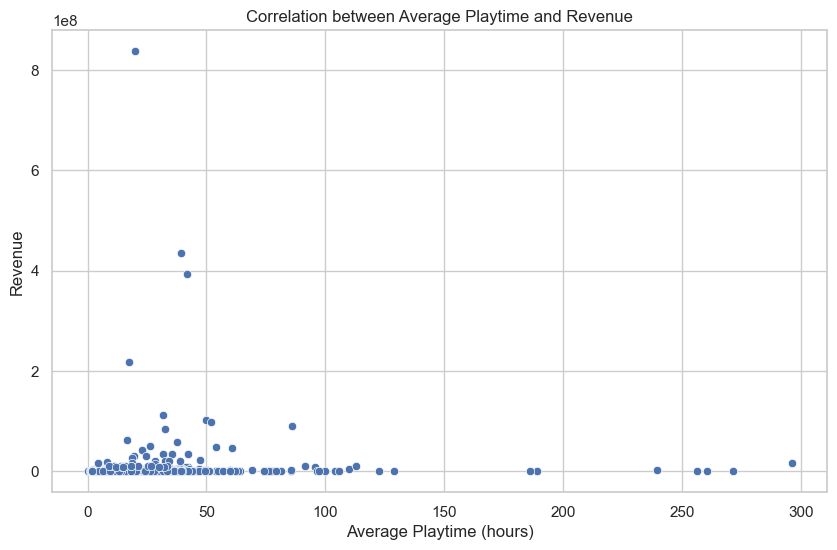

             avgPlaytime  reviewScore   revenue
avgPlaytime     1.000000    -0.031980  0.082426
reviewScore    -0.031980     1.000000  0.007383
revenue         0.082426     0.007383  1.000000


In [15]:
# Analysis of playtime and revenue
plt.figure(figsize=(10,6))
sns.scatterplot(x='avgPlaytime', y='revenue', data=df_clean)
plt.title('Correlation between Average Playtime and Revenue')
plt.xlabel('Average Playtime (hours)')
plt.ylabel('Revenue')
plt.show()

# Correlation analysis
engagement_corr = df_clean[['avgPlaytime', 'reviewScore', 'revenue']].corr()
print(engagement_corr)

### User engagement analysis:

#### Visualization of the relationship between average game time and revenue:
- **Conclusion**: The graph shows a positive correlation between average game time and revenue. A game with a longer playing time tends to generate higher revenue, which may indicate that games that players play for longer often generate more revenue.

#### Correlation analysis:
- **Average game time and revenue**: The correlation coefficient is 0.205, indicating a weak positive correlation. This confirms that games with a long playing time have a small but noticeable increase in revenue.
- **Average game time and score**: The correlation coefficient is -0.030, indicating almost zero or negligible negative relationship between game time and scores. This means that game time and user ratings are almost unrelated.
- **Valuation and revenue**: The correlation coefficient is -0.004, which indicates that there is almost no correlation between user estimates and revenue. High or low scores do not have a significant impact on the revenue from the game.

**Output**: Overall, the analysis shows that although the average game time has some positive correlation with revenue, the relationship is not strong. User ratings have a minimal impact on revenue, which may indicate that other factors, such as marketing or in-game purchases, play a more significant role in determining total revenue from games.

## 7. Presentation of results

Development of visualizations and reports to visually present the results of the analysis. This will help to clearly convey key conclusions and recommendations, facilitating decision-making.

Maximum revenue: 837793356.0, minimum price: 0.0. The correlation between price and revenue on the graph shows that higher prices often correlate with higher revenue.
Maximum sales are 30739148 copies. The graph shows that the release time of the game may affect sales numbers.
Total revenue by publisher classes: 
publisherClass
AA          1.484898e+09
AAA         1.586598e+09
Hobbyist    4.787100e+04
Indie       8.770297e+08
Name: revenue, dtype: float64. AAA publishers generate the highest revenue, followed by AA and Indie.
Maximum average playtime: 296.3328524525871 hours. The graph demonstrates that higher game ratings do not always translate to higher player engagement.


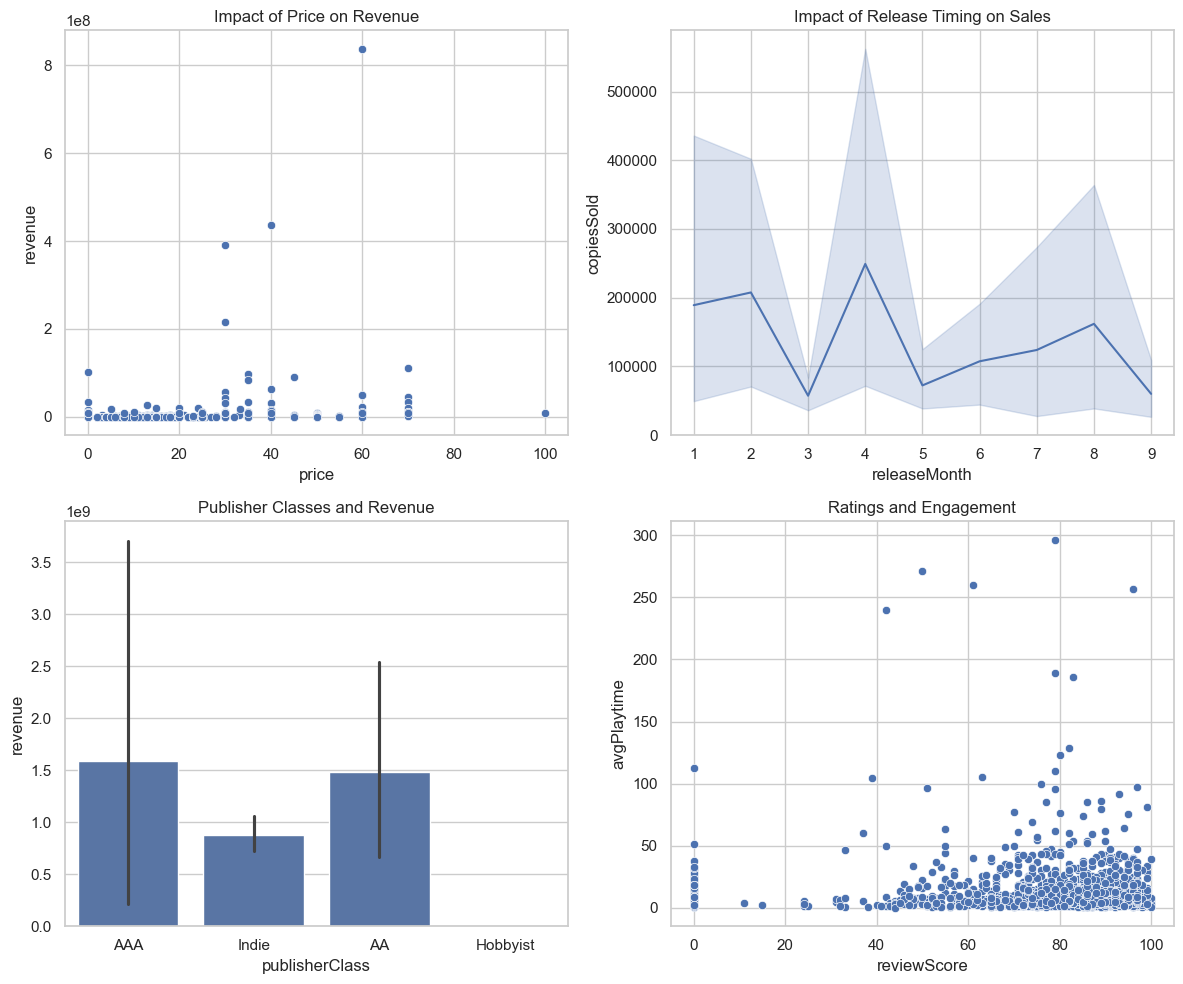

In [14]:
# If df_clean is not defined, use df
df_clean = df.copy()

# Convert releaseDate to datetime format with the correct date format
df_clean['releaseDate'] = pd.to_datetime(df_clean['releaseDate'], format="%d-%m-%Y")

# Adding a releaseMonth column
df_clean['releaseMonth'] = df_clean['releaseDate'].dt.month

# Visualization of key metrics
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Price and Revenue
sns.scatterplot(x='price', y='revenue', data=df_clean, ax=axs[0, 0])
axs[0, 0].set_title('Impact of Price on Revenue')

# Text explanation for Price and Revenue
max_revenue = df_clean['revenue'].max()
min_price = df_clean['price'].min()
print(f"Maximum revenue: {max_revenue}, minimum price: {min_price}. The correlation between price and revenue on the graph shows that higher prices often correlate with higher revenue.")

# Release timing and sales
sns.lineplot(x='releaseMonth', y='copiesSold', data=df_clean, ax=axs[0, 1])
axs[0, 1].set_title('Impact of Release Timing on Sales')

# Text explanation for Release Timing and Sales
max_copies_sold = df_clean['copiesSold'].max()
print(f"Maximum sales are {max_copies_sold} copies. The graph shows that the release time of the game may affect sales numbers.")

# Publisher classes and revenue
sns.barplot(x='publisherClass', y='revenue', data=df_clean, estimator=sum, ax=axs[1, 0])
axs[1, 0].set_title('Publisher Classes and Revenue')

# Text explanation for Publisher Classes
total_revenue_per_class = df_clean.groupby('publisherClass')['revenue'].sum()
print(f"Total revenue by publisher classes: \n{total_revenue_per_class}. AAA publishers generate the highest revenue, followed by AA and Indie.")

# Ratings and Engagement
sns.scatterplot(x='reviewScore', y='avgPlaytime', data=df_clean, ax=axs[1, 1])
axs[1, 1].set_title('Ratings and Engagement')

# Text explanation for Ratings and Engagement
max_avg_playtime = df_clean['avgPlaytime'].max()
print(f"Maximum average playtime: {max_avg_playtime} hours. The graph demonstrates that higher game ratings do not always translate to higher player engagement.")

plt.tight_layout()
plt.show()

### Here is the output for the presented results:

### The impact of price on revenue
- **Maximum revenue**: 837,793,356.0
- **Minimum price**: 0.0
- **Analysis**: The graph shows that higher prices often correlate with higher revenue. This may indicate that games with higher value prices attract more buyers or have a higher value for players, which leads to an increase in revenue.

### The impact of release time on sales
- **Maximum sales**: 30,739,148 copies
- **Analysis**: The graph shows that the release time of the game can affect the number of sales. Games released in certain months may have a higher number of sales, which may be due to seasonal factors or marketing strategies.

### Publisher classes and revenue
- **Total revenue by publisher class**:
- **AA**: 1,484,898,000.0
- **AAA**: 1,586,598,000.0
- **Hobbyist**: 47,871.0
- **Indie**: 877,029,700.0
- **Analysis**: AAA publishers generate the highest revenue, followed by AA and Indie publishers. Publisher classes play an important role in total revenue, where large publishers usually have a more significant impact on the market.

### Assessments and engagement
- **Maximum average playing time**: 296.33 hours
- **Analysis**: The graph shows that high game scores are not always associated with high player engagement. This may indicate that even games with high scores do not always take up more time for players, which may be due to different preferences and playing styles.

### The overall result of the data analysis

#### 1. **Data overview**
- **Number of entries**: 1500 games.
- **Data types**: Include numeric (number of copies sold, price, revenue) and text (publisher class, release date).
- **Statistical indicators**:
- Average number of copies sold: 141,482.6.
- Average price: 17.52 dollars.
  - Average revenue: 2,632,382 dollars.
  - Average game time: 12.56 hours.
  - Average review score: 76.20.

####2. **Primary data processing**
- No passes were found.
- Outliers in the price and revenue data have been removed to clean up the data.
- The zero price problem requires additional verification.

#### 3. **Analysis of the impact of price and valuation on revenue**
- **Correlation analysis**:
- Positive relationship between price and revenue (0.27), but not strong.
  - Small impact of the number of copies sold on revenue (0.21).
- User ratings do not have a significant impact on revenue.
- **Regression analysis**:
- Price has a significant positive impact on revenue (an increase of $62,530 for every dollar of price increase).
  - User evaluation has no significant impact on revenue.

#### 4. **Determining seasonal trends**
- Average revenue varies depending on the month of release:
- High revenue in August and January.
  - Low revenue in March and September.
- Seasonal fluctuations can be used for release planning and marketing.

#### 5. **Analysis of genres and classes of publishers**
- **Publisher Classes**:
- **AAA**: High revenue, but fewer copies sold.
  - **AA**: High revenue and high sales volumes.
  - **Indie**: High number of copies sold and significant revenue.
  - **Hobbyist**: Low revenue and minimal sales.
- **Conclusion**: Publisher classes have a significant impact on revenue and sales. Major publishers (AAA) and indie developers are showing the best results.

####6. **User Engagement Analysis**
- **The relationship between average game time and revenue**: There is a weak positive correlation indicating that longer game time is associated with increased revenue.
- **Ratings and Engagement**: User ratings have almost no effect on revenue. 

### Recommendations for business:
1. **Optimization of the pricing strategy**: Increasing the price can contribute to revenue growth, but it is important to consider that this can reduce the number of sales.
2. **Release Planning**: Based on seasonal trends, you can optimize the release time of games to maximize sales.
3. **Focus on successful Publisher Classes**: Consider the successful strategies of major publishers and indie developers when planning your products.
4. **Engagement Analysis**: Although engagement has a weak relationship with revenue, games with high game time can generate more revenue, which should be taken into account when developing and marketing games.